In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
Moratlity=pd.read_csv("/content/drive/MyDrive/Covid Canada/Mortality_Canada .csv")

In [3]:
Moratlity.head()

,death_id,province_death_id,case_id,age,sex,health_region,province,country,date_death_report
0,1,1,60.0,80-89,Male,Vancouver Coastal,BC,Canada,08-03-2020
1,2,1,477.0,70-79,Male,Simcoe Muskoka,Ontario,Canada,11-03-2020
2,3,2,NaN,NaN,NaN,Vancouver Coastal,BC,Canada,16-03-2020
3,4,3,NaN,NaN,NaN,Vancouver Coastal,BC,Canada,16-03-2020
4,5,4,NaN,NaN,NaN,Vancouver Coastal,BC,Canada,16-03-2020


In [4]:
Moratlity.isnull().sum()

death_id              0
province_death_id     0
case_id              29
age                  21
sex                  20
health_region         0
province              0
country               0
date_death_report     0
dtype: int64

In [5]:
Moratlity["health_region"].unique()

array(['Vancouver Coastal', 'Simcoe Muskoka', 'Fraser', 'Lanaudière',
       'Halton', 'Edmonton', 'York', 'Toronto',
       'Haliburton Kawartha Pineridge', 'Durham', 'Calgary', 'Hamilton',
       'Niagara', 'Not Reported'], dtype=object)

In [6]:
Moratlity.describe()

,death_id,province_death_id,case_id
count,35.000000,35.000000,6.000000
mean,18.000000,6.285714,805.666667
std,10.246951,4.011538,568.377222
min,1.000000,1.000000,60.000000
25%,9.500000,3.000000,495.000000
50%,18.000000,6.000000,677.500000
75%,26.500000,9.500000,1303.250000
max,35.000000,14.000000,1473.000000


In [7]:
# fill the missing values for categorical terms - mode
Moratlity['age'] = Moratlity["age"].fillna(Moratlity['age'].mode()[0])
Moratlity['sex'] = Moratlity["sex"].fillna(Moratlity['sex'].mode()[0])
# fill the missing values for numerical terms - mean
Moratlity['case_id'] = Moratlity['case_id'].fillna(Moratlity['case_id'].mean())

In [8]:
Moratlity.isnull().sum()

death_id             0
province_death_id    0
case_id              0
age                  0
sex                  0
health_region        0
province             0
country              0
date_death_report    0
dtype: int64

In [9]:
Moratlity.shape

(35, 9)

In [10]:
age=pd.read_csv("/content/drive/MyDrive/Covid Canada/COVID-19_Age.csv")

In [11]:
age.head()

,Age_start,Age_end,Positive,Country,Date
0,0,9,43,Italy,3/11/2020
1,10,19,85,Italy,3/11/2020
2,20,29,296,Italy,3/11/2020
3,30,39,470,Italy,3/11/2020
4,40,49,891,Italy,3/11/2020


In [12]:
age.isnull().sum()

Age_start    0
Age_end      0
Positive     0
Country      0
Date         0
dtype: int64

In [13]:
age.shape

(172, 5)

In [14]:
public=pd.read_csv("/content/drive/MyDrive/Covid Canada/Public_COVID-19_Canada .csv")

In [15]:
public.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired
0,1.0,1.0,50-59,Male,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1,China,NaN
1,2.0,2.0,50-59,Female,Toronto,Ontario,Canada,27-01-2020,26-01-2020,1,China,NaN
2,3.0,1.0,40-49,Male,Vancouver Coastal,BC,Canada,28-01-2020,26-01-2020,1,China,NaN
3,4.0,3.0,20-29,Female,Middlesex-London,Ontario,Canada,31-01-2020,26-01-2020,1,China,NaN
4,5.0,2.0,50-59,Female,Vancouver Coastal,BC,Canada,04-02-2020,02-02-2020,0,NaN,Close Contact


In [16]:
public.isnull().sum()

case_id                    500
provincial_case_id         500
age                        500
sex                        500
health_region              500
province                   500
country                    500
date_report                500
report_week                500
travel_yn                  500
travel_history_country    3547
locally_acquired          3762
dtype: int64

In [17]:
public.describe()

,case_id,provincial_case_id
count,3409.000000,3409.000000
mean,1705.000000,425.074802
std,984.237861,348.803475
min,1.000000,1.000000
25%,853.000000,138.000000
50%,1705.000000,351.000000
75%,2557.000000,612.000000
max,3409.000000,1339.000000


In [18]:
public.shape

(3909, 12)

In [19]:
# fill the missing values for categorical terms - mode
public['age'] = public["age"].fillna(public['age'].mode()[0])
public['sex'] = public["sex"].fillna(public['sex'].mode()[0])
public['health_region'] = public["health_region"].fillna(public['health_region'].mode()[0])
public['province'] = public["province"].fillna(public['province'].mode()[0])
public['country'] = public["country"].fillna(public['country'].mode()[0])
public['date_report'] = public["date_report"].fillna(public['date_report'].mode()[0])
public['report_week'] = public["report_week"].fillna(public['report_week'].mode()[0])
public['travel_yn'] = public["travel_yn"].fillna(public['travel_yn'].mode()[0])
public['travel_history_country'] = public["travel_history_country"].fillna(public['travel_history_country'].mode()[0])
public['locally_acquired'] = public["locally_acquired"].fillna(public['locally_acquired'].mode()[0])
# fill the missing values for numerical terms - mean
public['case_id'] = public['case_id'].fillna(public['case_id'].mean())
public['provincial_case_id'] = public['provincial_case_id'].fillna(public['provincial_case_id'].mean())

In [20]:
public.isnull().sum()

case_id                   0
provincial_case_id        0
age                       0
sex                       0
health_region             0
province                  0
country                   0
date_report               0
report_week               0
travel_yn                 0
travel_history_country    0
locally_acquired          0
dtype: int64

In [21]:
recovered=pd.read_csv("/content/drive/MyDrive/Covid Canada/Recovered_Canada .csv")

In [22]:
recovered.head()

,date_recovered,province,cumulative_recovered,province_source
0,12-02-2020,Alberta,NaN,Alberta
1,13-02-2020,Alberta,NaN,BC
2,14-02-2020,Alberta,NaN,Manitoba
3,15-02-2020,Alberta,NaN,New Brunswick
4,16-02-2020,Alberta,NaN,NL


In [23]:
recovered.isnull().sum()

date_recovered            0
province                  0
cumulative_recovered    339
province_source         546
dtype: int64

In [24]:
recovered.shape

(559, 4)

In [25]:
recovered.describe()


,cumulative_recovered
count,220.000000
mean,3.531818
std,18.143363
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,183.000000


In [26]:
# fill the missing values for numerical terms - mean
recovered['cumulative_recovered'] = recovered['cumulative_recovered'].fillna(recovered['cumulative_recovered'].mean())
# fill the missing values for categorical terms - mode
recovered['province_source'] = recovered["province_source"].fillna(recovered['province_source'].mode()[0])

In [27]:
recovered.isnull().sum()

date_recovered          0
province                0
cumulative_recovered    0
province_source         0
dtype: int64

In [28]:
testing=pd.read_csv("/content/drive/MyDrive/Covid Canada/Testing_Canada .csv")

In [29]:
testing.head()

,date_testing,province,cumulative_testing,province_source
0,15-03-2020,Alberta,7108,Alberta
1,16-03-2020,Alberta,10598,BC
2,17-03-2020,Alberta,12355,Manitoba
3,18-03-2020,Alberta,14566,New Brunswick
4,19-03-2020,Alberta,17013,NL


In [30]:
testing.isnull().sum()

date_testing            0
province                0
cumulative_testing     12
province_source       129
dtype: int64

In [31]:
testing.describe()

,date_testing,province,cumulative_testing,province_source
count,143,143,131,14
unique,11,13,107,14
top,15-03-2020,PEI,6326,Note: *Change in reported testing definition
freq,13,11,5,1


In [32]:
# fill the missing values for categorical terms - mode
testing['province_source'] = testing["province_source"].fillna(testing['province_source'].mode()[0])


# Let's see Corona Virus Symtomps

In [39]:
 symptoms={'symptom':['Fever',
        'Dry cough',
        'tiredness',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,52.8,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(15))

In [40]:
symptoms

,symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,tiredness,52.8
3,Fatigue,38.1
4,Sputum production,33.4
5,Shortness of breath,18.6
6,Muscle pain,14.8
7,Sore throat,13.9
8,Headache,13.6
9,Chills,11.4


In [46]:
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             y="percentage", x="symptom", color='symptom', 
             log_y=True, template='ggplot2', title='Symptom of  Coronavirus')
fig.show()

<Figure size 720x432 with 0 Axes>

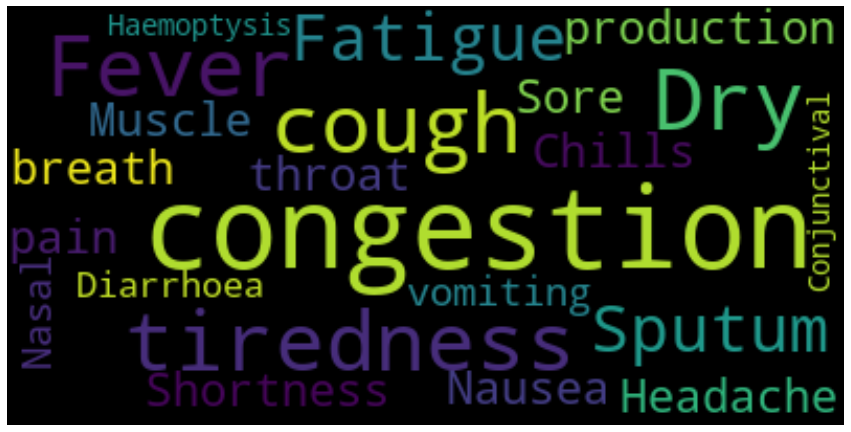

In [48]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in symptoms.symptom)
wordcloud = WordCloud(max_words=200,).generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

# Testing Covid 19 In the States of Canada According to The Province.

So fromt the WordCloud And Bar plot, We can see that "Congestio", "Cough","fever","Fatigue" and "Tiredness" Are the commonn symtomp.

In [49]:
testing = testing.rename(columns={"date_testing":"Date"})

In [50]:
testing.head()

,Date,province,cumulative_testing,province_source
0,15-03-2020,Alberta,7108,Alberta
1,16-03-2020,Alberta,10598,BC
2,17-03-2020,Alberta,12355,Manitoba
3,18-03-2020,Alberta,14566,New Brunswick
4,19-03-2020,Alberta,17013,NL


In [53]:
age = age[age["Country"]=="Canada"]
age['age'] = ((age['Age_start'] + age['Age_end']+1)/2)

In [54]:
Alberta = testing[testing["province"] == "Alberta"]
BC = testing[testing["province"] == "BC"]
New_Brunswick = testing[testing["province"] == "New Brunswick"]
NL = testing[testing["province"] == "NL"]
Nova_Scotia = testing[testing["province"] == "Nova Scotia"]
Ontario = testing[testing["province"] == "Ontario"]
PEI = testing[testing["province"] == "PEI"]
Quebec = testing[testing["province"] == "Quebec"]
Saskatchewan = testing[testing["province"] == "Saskatchewan"]
NWT = testing[testing["province"] == "NWT"]
Nunavut = testing[testing["province"] == "Nunavut"]
Yukon = testing[testing["province"] == "Yukon"]

In [56]:
s = testing['province']
s = s.dropna()
s=s.unique()

<Figure size 720x432 with 0 Axes>

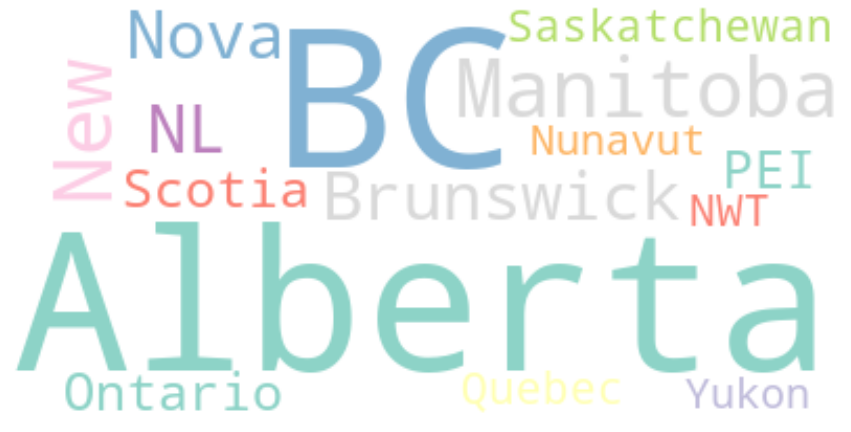

In [57]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in s)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

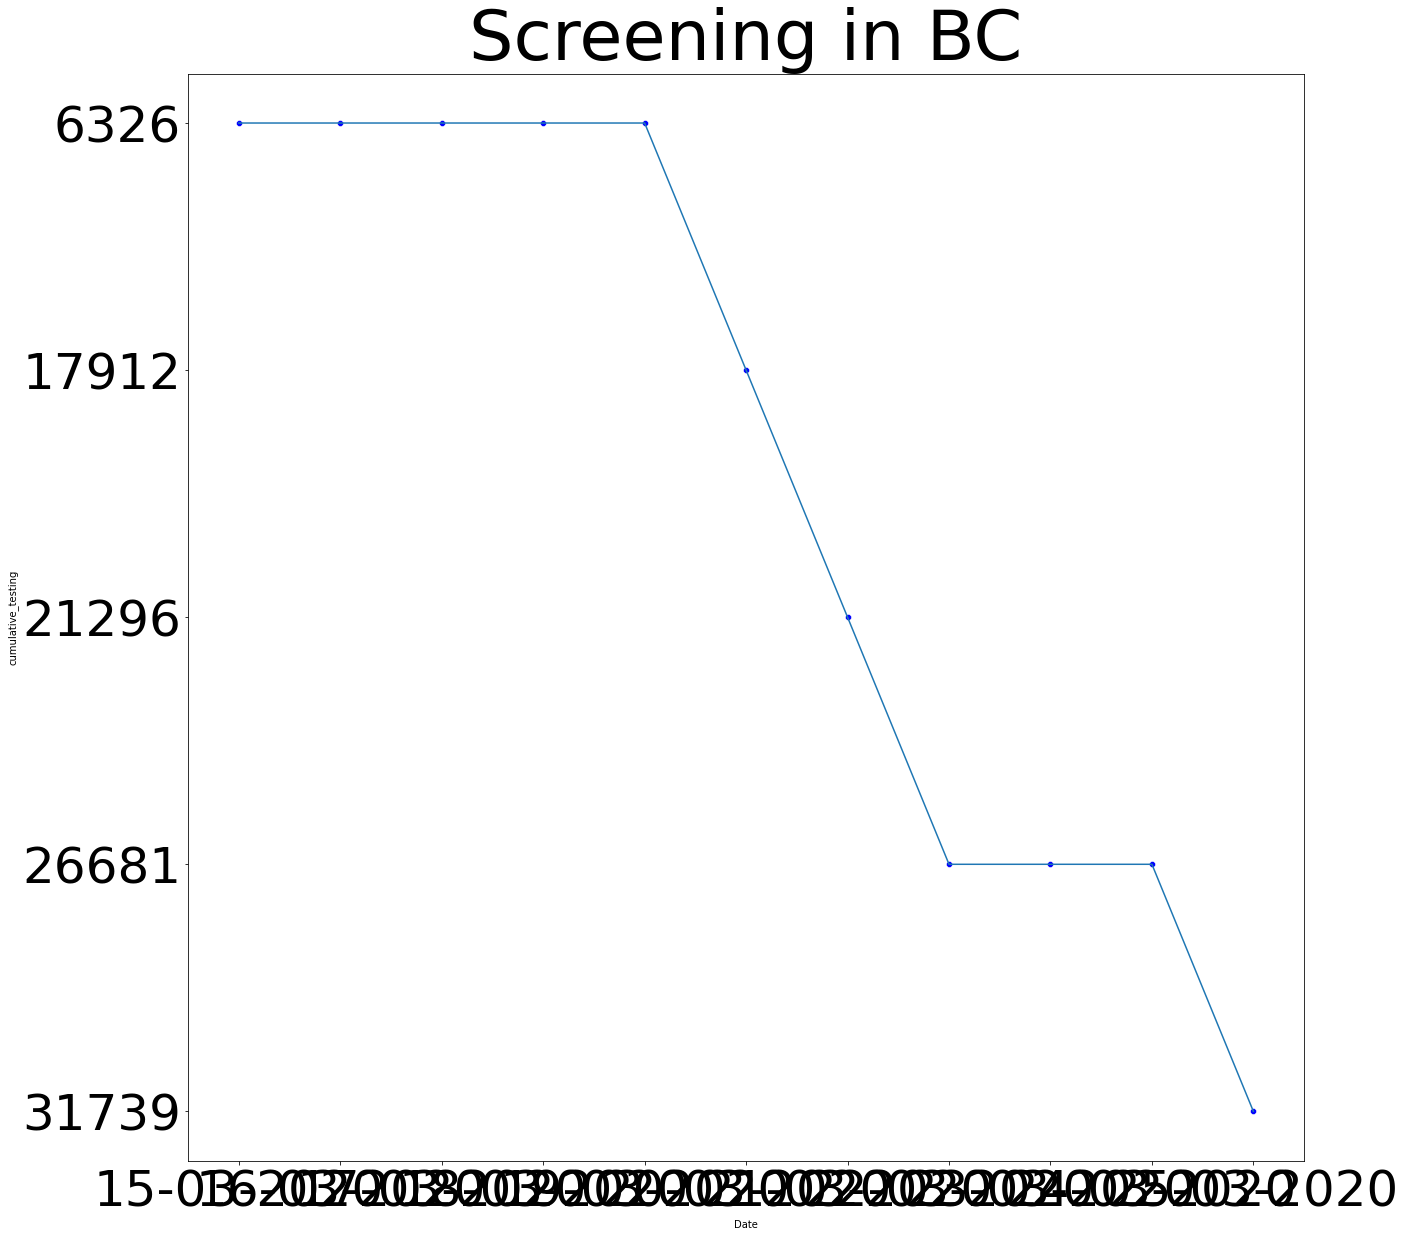

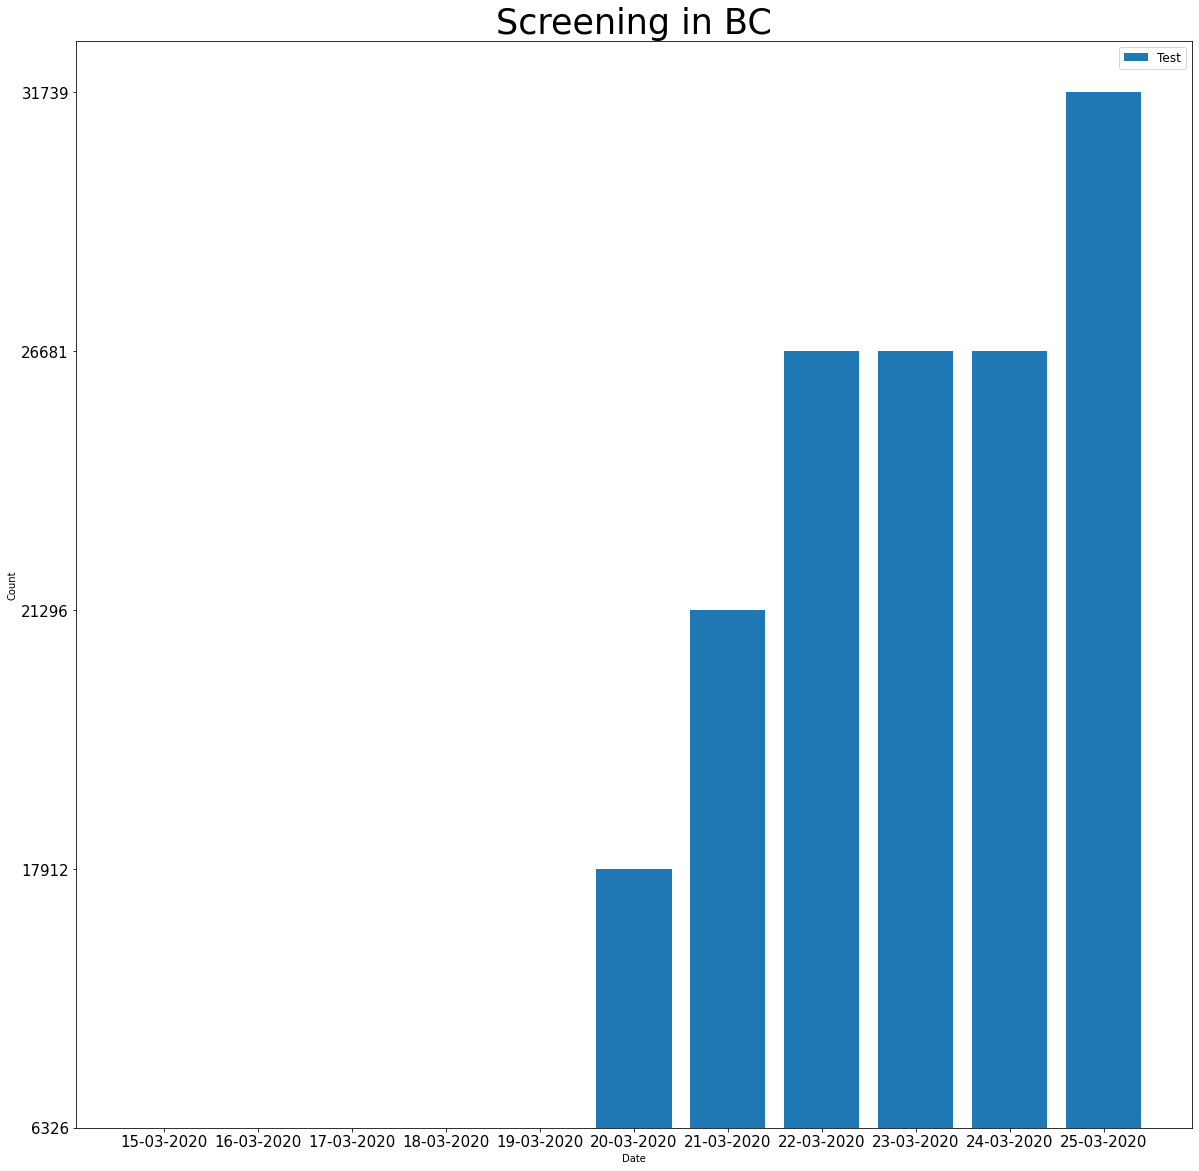

In [61]:
#BC
f, ax = plt.subplots(figsize=(20,20))
ax=sns.scatterplot(x="Date", y="cumulative_testing", data=BC,
             color="blue")
plt.plot(BC.Date,BC.cumulative_testing,zorder=1)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in BC',fontsize=70)


plt.figure(figsize=(20,20))
plt.bar(BC.Date, BC.cumulative_testing,label="Test")
plt.xlabel('Date')
plt.ylabel("Count")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Screening in BC',fontsize=35)
plt.legend(frameon=True, fontsize=12)
plt.show()

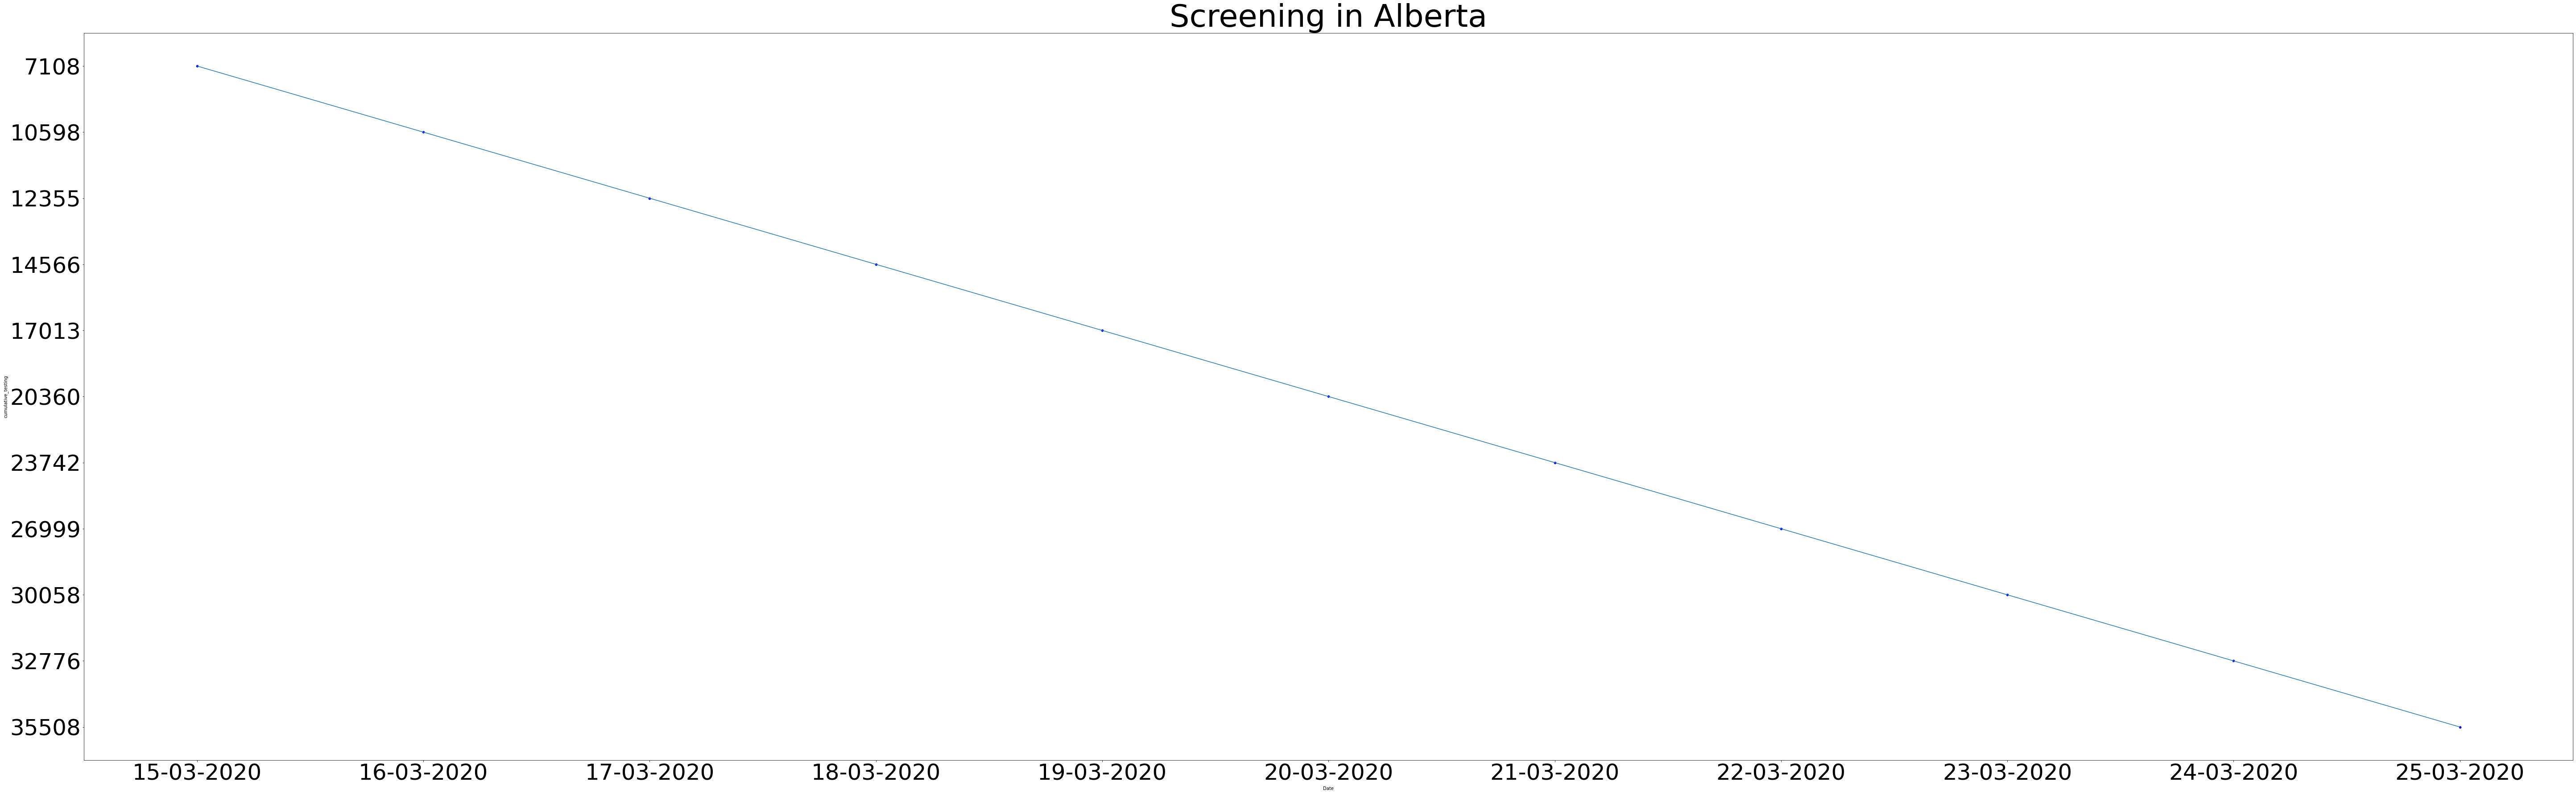

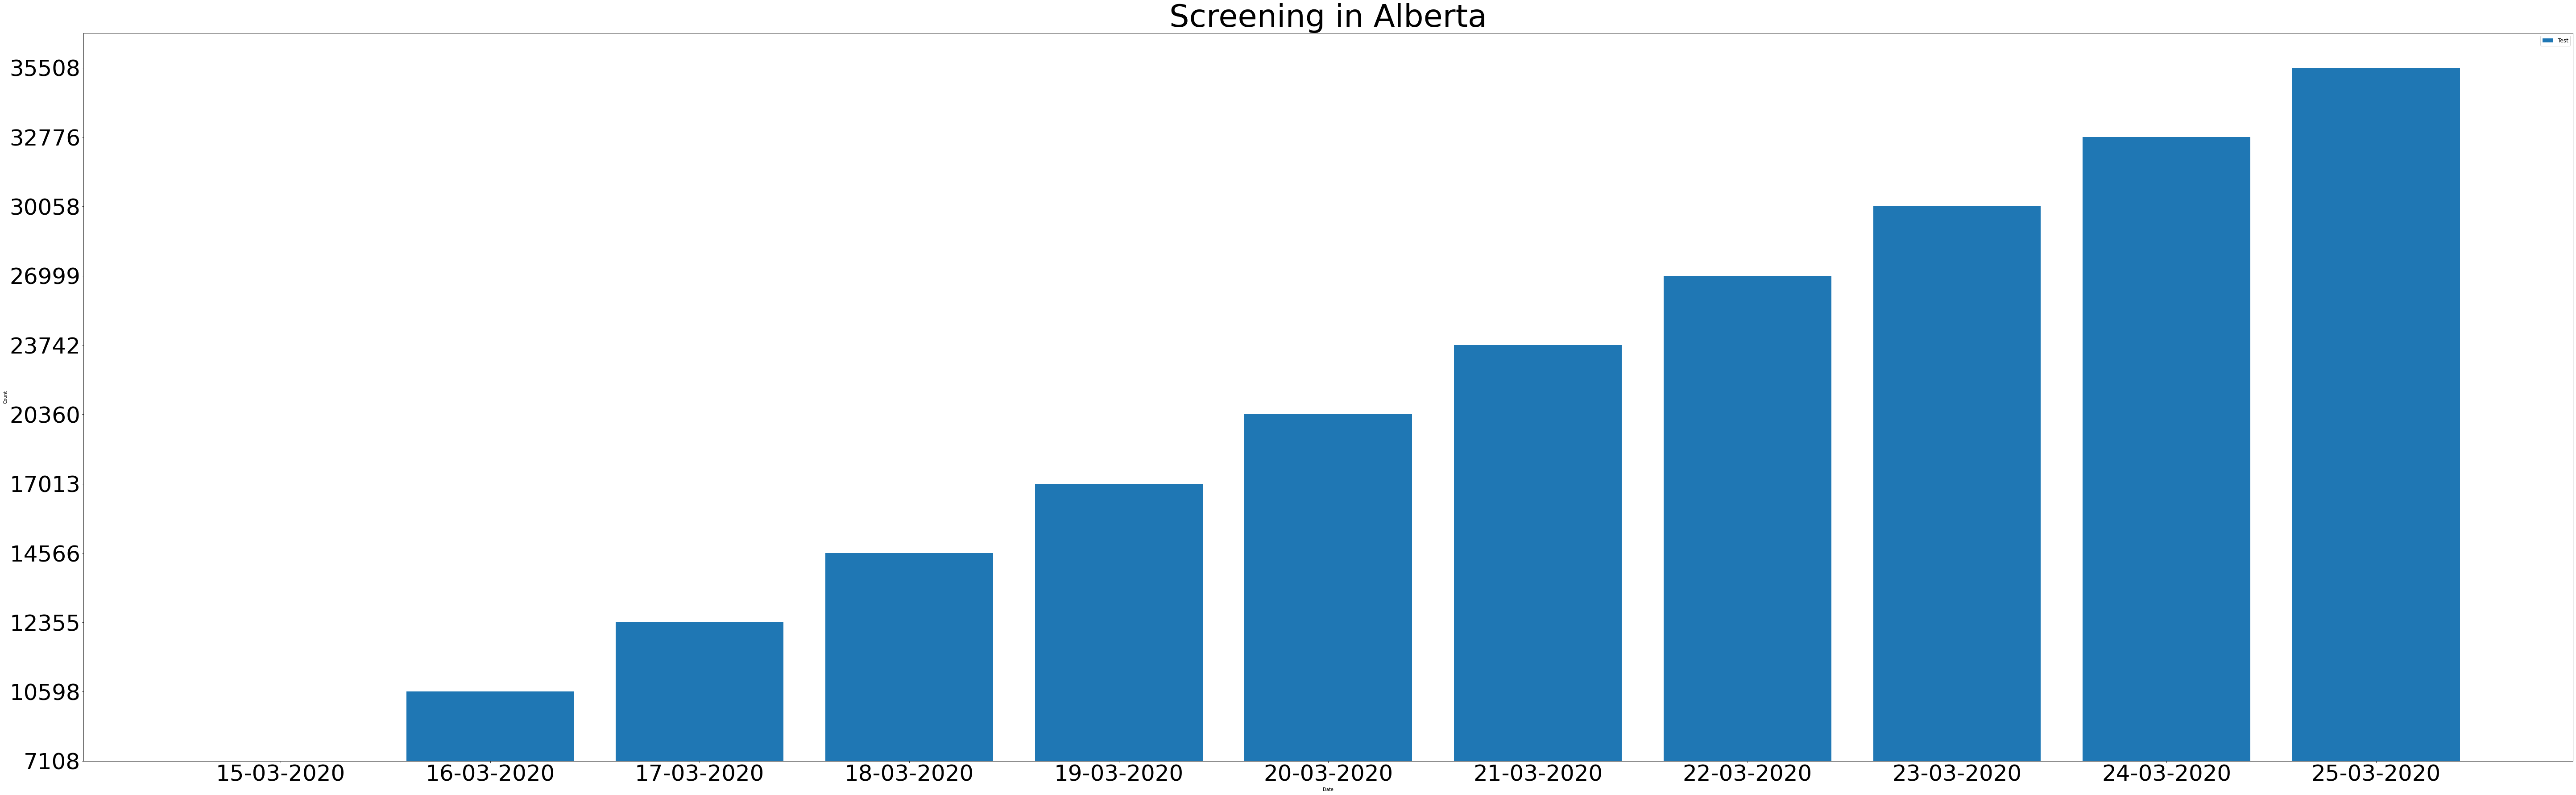

In [59]:
#Alberta
f, ax = plt.subplots(figsize=(100, 30))
ax=sns.scatterplot(x="Date", y="cumulative_testing", data=Alberta,
             color="blue")
plt.plot(Alberta.Date,Alberta.cumulative_testing,zorder=1)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in Alberta',fontsize=70)


plt.figure(figsize=(100,30))
plt.bar(Alberta.Date, Alberta.cumulative_testing,label="Test")
plt.xlabel('Date')
plt.ylabel("Count")
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Screening in Alberta',fontsize=70)
plt.legend(frameon=True, fontsize=12)
plt.show()


So, Testing Cases In Alberta and BC province placed in the top then other PRovince. Though The population of Ontario and Qubec are more than Alberta and BC But The testing rate is more.
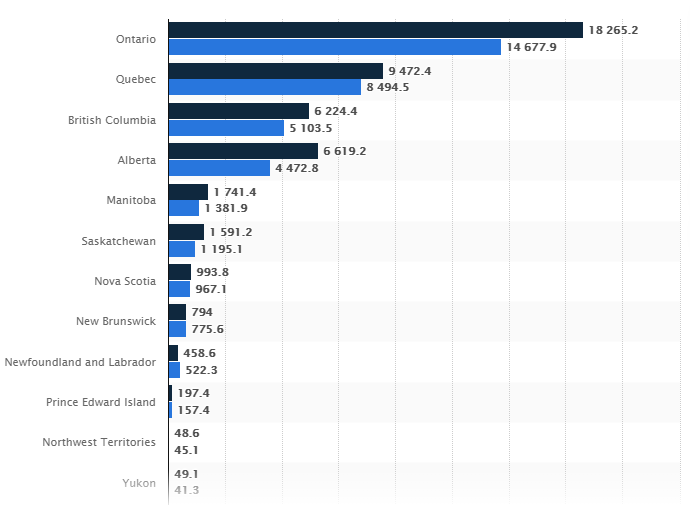

# Number of Cases In Canada

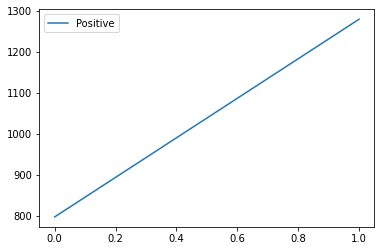

In [62]:
confirmbydate = age.loc[:,["Date","Positive"]]
confirmbydate = confirmbydate.groupby("Date")[["Positive"]].sum().reset_index()
confirmbydate.plot()

In [64]:
print("Total Cases in Canada : " + str(public.case_id.max()))
print("Maximum Cases in Province : " + str(public.provincial_case_id.max()))

Total Cases in Canada : 3409.0
Maximum Cases in Province : 1339.0


# Confirmation By Gender

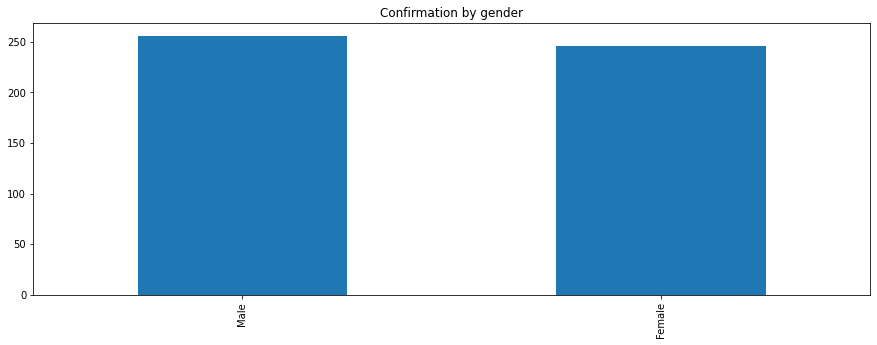

In [68]:
gender =public['sex']
gender = gender[gender!='Not Reported']
plt.figure(figsize=(15, 5))
plt.title('Confirmation by gender')
gender.value_counts().plot.bar();

In [70]:
agc = public[public.sex!="Not Reported"]
agc = agc['sex'].dropna()
fig = px.pie(agc,
             names="sex",
             title="Gender of Confirm person",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Confirm By Age

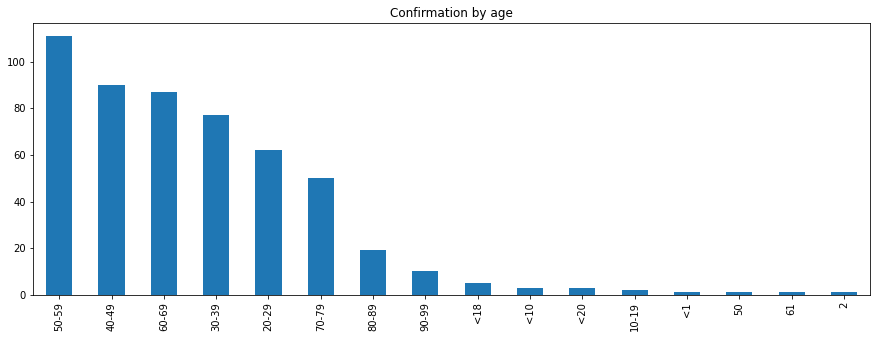

In [71]:
age = public['age']
age = age[age!='Not Reported']
plt.figure(figsize=(15, 5))
plt.title('Confirmation by age')
age.value_counts().plot.bar();

In [72]:
agc = public[public.age!="Not Reported"]

fig = px.pie(agc,
             names="age",
             title="Age of Confirm person",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

So Mostly 50-59 years old people are mostly affected in Canada!

# Number Of Patients according to Province of Canada

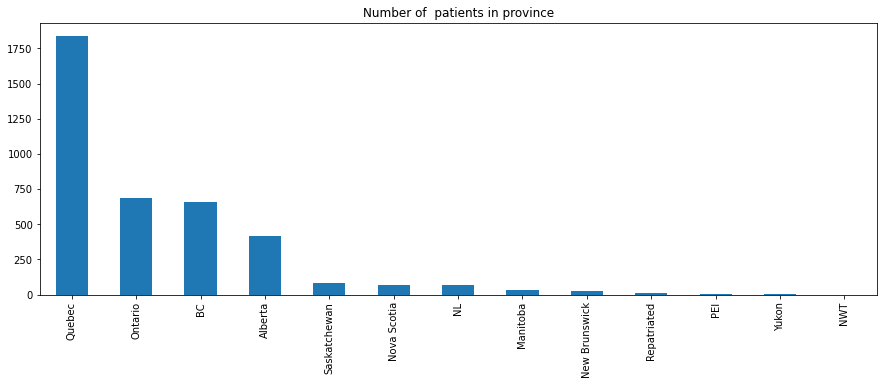

In [73]:
plt.figure(figsize=(15,5))
plt.title('Number of  patients in province')
public.province.value_counts().plot.bar();

<Figure size 720x432 with 0 Axes>

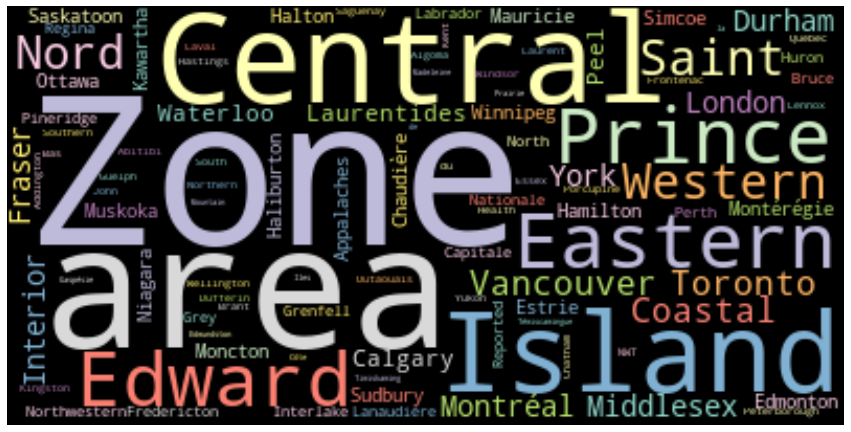

In [74]:
c = public['health_region']
c = c.unique()
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in c)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

Cities that are affected mostly with Covid Cases

<Figure size 720x432 with 0 Axes>

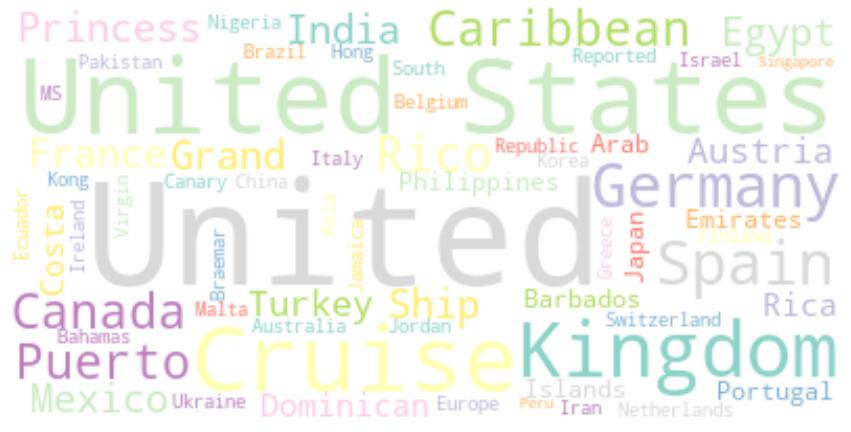

In [75]:
t = public['travel_history_country']
t = t.unique()
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in t)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

The affected People are mostly travel to United Staes, UK and Spain. So it could be a cause of Corona Virus!

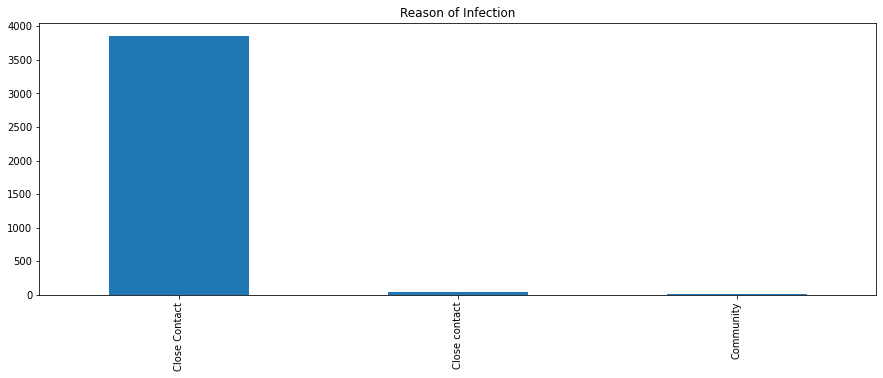

In [76]:
plt.figure(figsize=(15,5))
plt.title('Reason of Infection')
public.locally_acquired.value_counts().plot.bar();

Mostly People Who are being affected in Covid  has close contact with other corona virus affected person!

# Deaths In Canada

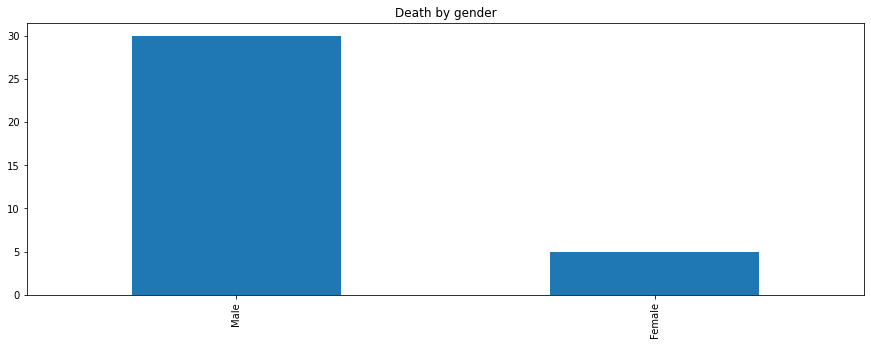

In [81]:
plt.figure(figsize=(15, 5))
plt.title('Death by gender')
Moratlity.sex.value_counts().plot.bar();

In [85]:
fig = px.pie( values=Moratlity.groupby(['sex']).size().values,names=Moratlity.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=25,
        color="#242323"
    )
    )   
    
py.iplot(fig)

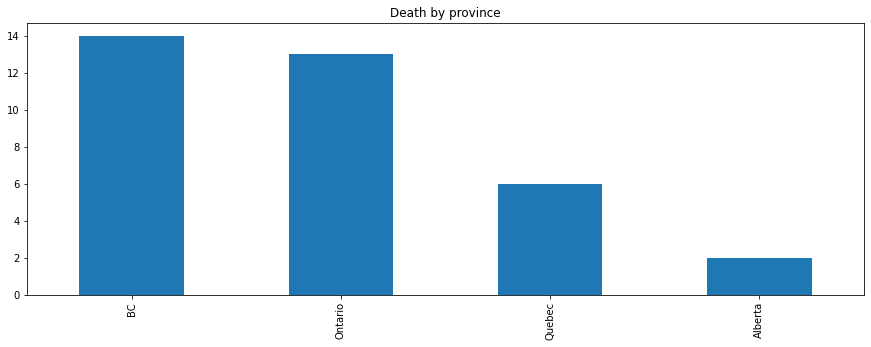

In [86]:
plt.figure(figsize=(15, 5))
plt.title('Death by province')
Moratlity.province.value_counts().plot.bar();

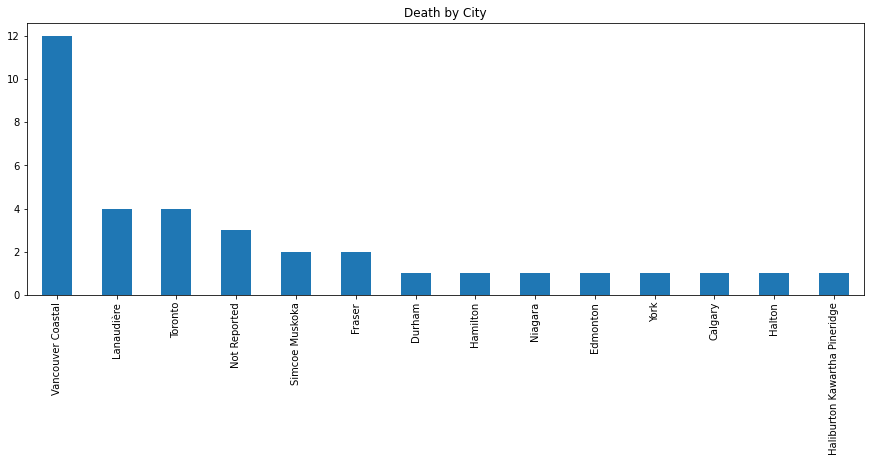

In [87]:
plt.figure(figsize=(15, 5))
plt.title('Death by City')
Moratlity.health_region.value_counts().plot.bar();

In [88]:
print("Total death in Canada till " + str(Moratlity.date_death_report.max()) + " is "+ str(Moratlity.death_id.max()))

Total death in Canada till 25-03-2020 is 35


# Modeling Using MLPRegressor

In [89]:
data=pd.read_csv("/content/drive/MyDrive/Covid Canada/covid_19_clean_complete.csv")

In [90]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [91]:
data = data[data["Country/Region"] == "Canada"]
data = data.loc[:,["Date","Confirmed"]]
data = data.groupby("Date")[["Confirmed"]].max().reset_index()

In [92]:
data.head()

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,1


In [93]:
data.columns = ['ds','y']

In [94]:
data1 = data.cumsum()
data1 = data1.loc[:,["y"]]
data1 = data1[20:]
x = np.arange(len(data1)).reshape(-1, 1)
y = data1.values.reshape(-1, 1)

In [95]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
_=model.fit(x, y.ravel())

In [96]:
test = np.arange(len(data1)+7).reshape(-1, 1)
pred = model.predict(test)
prediction = pred.round().astype(int)

In [97]:
prediction = pd.DataFrame(prediction)

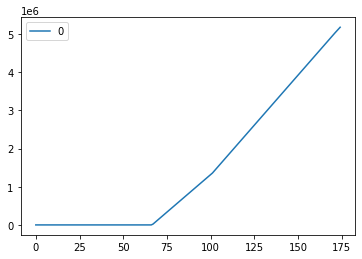

In [98]:
prediction.plot()

# LSTM

In [99]:
dataset = data
dataset.columns = ['confirmed_date','Confirmed']
dataset = dataset.drop("confirmed_date",axis=1)

In [100]:
data = np.array(dataset).reshape(-1, 1)
train_data = dataset[:len(dataset)-5]
test_data = dataset[len(dataset)-5:]

In [101]:
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
n_input =5
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_input, n_features)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units = 1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(generator, epochs = 50)

Epoch 1/50
178/178 [==============================] - 7s 8ms/step - loss: 0.1032
Epoch 2/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0069
Epoch 3/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0066
Epoch 4/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0037
Epoch 5/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0084
Epoch 6/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0046
Epoch 7/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0036
Epoch 8/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0036
Epoch 9/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0057
Epoch 10/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0042
Epoch 11/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0040
Epoch 12/50
178/178 [==============================] - 1s 8ms/step - loss: 0.0031
Epoch 13/50
178/178 [====

In [102]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [103]:
prediction = pd.DataFrame(scaler.inverse_transform(lstm_predictions_scaled))
prediction.head()

,0
0,58230.217593
1,58287.377838
2,58346.313118
3,58405.683522
4,58457.311462
